In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
# تعریف متغیرهای فازی
temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

c:\Users\amazonshop\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


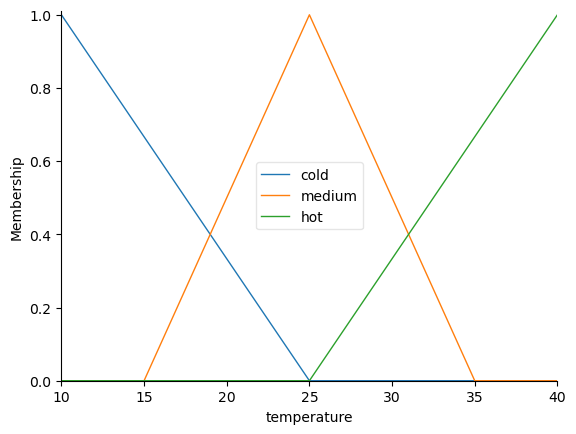

In [3]:
# توابع عضویت دما
temperature['cold'] = fuzz.trimf(temperature.universe, [10, 10, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])
temperature.view()

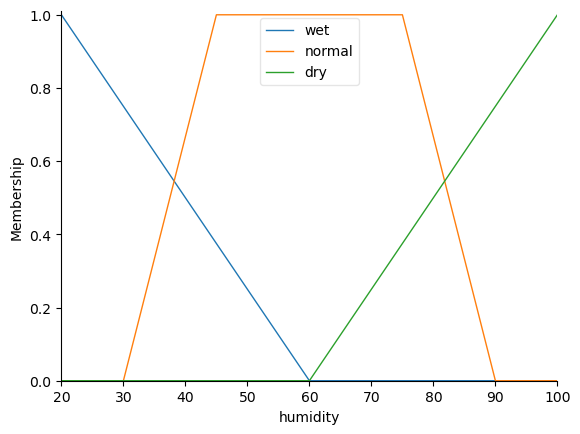

In [4]:
# توابع عضویت رطوبت
humidity['wet'] = fuzz.trimf(humidity.universe, [20, 20, 60])
humidity['normal'] = fuzz.trapmf(humidity.universe, [30, 45, 75, 90])
humidity['dry'] = fuzz.trimf(humidity.universe, [60, 100, 100])
humidity.view()

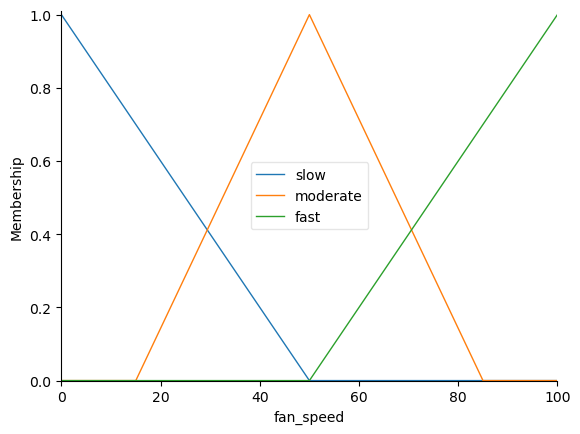

In [5]:
# توابع عضویت سرعت فن
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['moderate'] = fuzz.trimf(fan_speed.universe, [15, 50, 85])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])
fan_speed.view()

دما (ورودی): 35
رطوبت (ورودی): 72
سرعت فن : 67.58


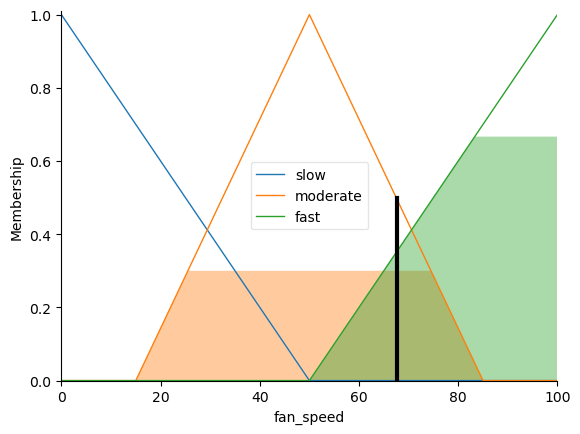

In [6]:
# قوانین فازی
rules = [
    ctrl.Rule(temperature['cold'] & humidity['dry'], fan_speed['slow']),
    ctrl.Rule(temperature['medium'] & humidity['dry'], fan_speed['slow']),
    ctrl.Rule(temperature['cold'] & humidity['wet'], fan_speed['moderate']),
    ctrl.Rule(temperature['hot'] & humidity['dry'], fan_speed['moderate']),
    ctrl.Rule(temperature['medium'] & humidity['normal'], fan_speed['moderate']),
    ctrl.Rule(temperature['hot'] & humidity['normal'], fan_speed['fast']),
    ctrl.Rule(temperature['hot'] & humidity['wet'], fan_speed['fast']),
    ctrl.Rule(temperature['medium'] & humidity['wet'], fan_speed['fast']),
]

# ساخت سیستم کنترل و شبیه‌ساز
fan_ctrl = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(fan_ctrl)

# مقداردهی ورودی‌ها
temp_input = 35
humidity_input = 72
sim.input['temperature'] = temp_input
sim.input['humidity'] = humidity_input
sim.compute()

# نمایش خروجی
print("دما (ورودی):", temp_input)
print("رطوبت (ورودی):", humidity_input)
print("سرعت فن :", round(sim.output['fan_speed'], 2))

# نمایش نتیجه سرعت فن
fan_speed.view(sim=sim)

plt.show()